# Experimenations with Number of Clusters for Cluster Scheduling

High Level Overview:  
This notebook experiments with the cluster scheduling method in 2_CS_Iterative_Cluster_Introduction.ipynb using different numbers of clusters. A recap of the method is to use kmeans to separate data into clusters. Then to train a model on the first cluster, then retrain with two clusters, then retrain with 3 and so on for the rest of the clusters.  
.  
/  
/  
The code in this notebook is outlined below:
Load Data: First, the MNIST is loaded in normalized and the training data is reshaped for usage in k-means clustering.

Clustering: The clustering() function performs k-means clustering on the training data for a given number of clusters. It assigns the training data and labels to each cluster and reshapes the feature data back to original shape (28, 28) before returning the clusters in a dictionary.

Cluster Variation: The cluster_variations() function executes the clustering() function with different numbers of clusters as defined in num_clusters_to_test. It stores the cluster dictionaries returned by clustering() function into a list cluster_dicts_list.

Model Definition: The define_new_mode() function defines a sequential model (using Keras) with a flatten layer, a dense layer with ReLU activation, and an output layer with softmax activation. The model is compiled with the Adam optimizer, sparse categorical cross entropy loss, and accuracy as a metric.

Cluster Scheduling: The cluster_scheduling() function trains the model on the clusters of data in sequence. After each cluster, the model is evaluated on the validation data, and the score is saved to historical_scores. Once all clusters have been used for training, the model is recompiled with a lower learning rate for fine-tuning. The total time for training and fine-tuning is calculated, and the model is evaluated one last time.

Running All Clusters: The run_all_clusters() function applies the cluster scheduling process to each set of clusters stored in cluster_dicts_list. It keeps a record of the final score, historical scores, and run times for each set of clusters.

At the end of this process, score_of_cluster holds the final evaluation results for each configuration of clusters, the historical scores after each cluster subset of training data, and the time it took to train and fine-tune the model. This information can be used to understand how different numbers of clusters affect the performance and efficiency of the training process.

In [41]:
#import mnist form tf
from tensorflow import keras
from keras.datasets import mnist
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import pandas as pd

# Load in Data

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 #normalize the data
x_train = x_train.reshape(len(x_train), -1) #flatten x_train for kmeans

print(f'X_train shape: {x_train.shape} \nX_test shape: {x_test.shape} \ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape: (60000, 784) 
X_test shape: (10000, 28, 28) 
y_train shape: (60000,)
y_test shape: (10000,)


# Clustering and Cluster Storage

cluster() initializes the dict cluster, then applies kmeans to the dataset with num clusters determined by the num_clusters parameter. It then predicts the cluster for each data point and stores these predictions in pred_cluster. Then it iterates through each cluster and creates a key value pairing for cluster's number to the list [features, labels]. The data for each cluster is then returned to the correct shape of (28, 28). The final dictionary is returned. 

cluster_variations() takes the list num_clusters_to_test as a parameter, which contains the different number of clusters to parametrize KMeans with. The function iterates through the different num_clusters, appending the cluster_dict returned by cluster() to the list cluster_dicts_list(), which is then returned.


In [3]:
def clustering(num_clusters):
    cluster = {}
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(x_train)
    pred_cluster = kmeans.predict(x_train) #predict cluster for each data point
    
    for i in range(num_clusters): #for each cluster
        cluster[i] = [  x_train[np.where(pred_cluster == i)], y_train[np.where(pred_cluster == i)]  ]#assign [cluster i, associated labels] list to cluster[i]
        cluster[i][0] = cluster[i][0].reshape(len(cluster[i][0]), 28, 28) #rehape cluster features back to shape (batch, 28, 28)

    return cluster #return cluster dictionary

def cluster_variations(num_clusters_to_test):
    cluster_dicts_list = []
    for num_clusters in num_clusters_to_test:
        clusters_dict = clustering(num_clusters)
        cluster_dicts_list.append(clusters_dict), print(f'KMeans with {num_clusters} clusters complete')
    return cluster_dicts_list

In [5]:
num_clusters_to_test = list(range(10, 110, 10)) #list of 10 -> 110 in increments of 10
cluster_dicts_list = cluster_variations(num_clusters_to_test)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 10 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 20 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 30 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 40 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 50 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 60 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 70 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 80 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 90 clusters complete


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans with 100 clusters complete


# Cluster Scheduling

define_new_model() is used to create a new model to train on the next set of clustered data. The model is a simple mist MLP with  two hidden dense layers.

In [7]:
def define_new_mode():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cluster_scheduling() is passed a dictionary of clustered data, the number of clusters the data was split into, and a new model as defined by define_new_model(). The first cluster is extracted from the dictionary into the more readable variable names X and y.

A timer is started before the main for loop of the function begins to track runtime of training. The for loop iterates over each cluster, first splitting X and y into train and val using train_test_split form sklearn. Then the model is fit to the training data using early stopping. After training has concluded, a boolean expression checks if the current iter is the last iter. If it is not, the next cluster in cluster_dict is concatenated to X and y. Historical scores is then appended the model evaluation. The loop then repeats with X and y updated for model training with two clusters. 

After the for loop has concluded, the model is recompiled with 1/100th the learning rate for fine tuning. The timer stops and the runtime is calculated after this training finishes. The score of the model, the historical scores, and the run time are then returned.

In [14]:
def cluster_scheduling(cluster_dict, num_clusters, model):
    X, y = cluster_dict[0][0], cluster_dict[0][1] #get first cluster's data from cluster_dict
    historical_scores = [] #list to store scores after each cluster subset of training data

    start_time = time.time() #start timer
    for i in range(num_clusters):
        # resplit data into train and validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #split data into train and validation

        model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=10)], verbose=0) #train model on current subset of data
        if i == num_clusters: #if last cluster, break
            X = np.concatenate((X_train, cluster_dict[i+1][0]), axis=0)#if not last cluster, concatenate next cluster's data to current data
            y = np.concatenate((y_train, cluster_dict[i+1][1]), axis=0)
        historical_scores.append(model.evaluate(X_val, y_val, verbose=0)) #evaluate on current subset of validation data and append score to historical_scores
        print(f'Score after {i+1} cluster subsets of training data for {num_clusters} clusters: {historical_scores[i]}') # evaluate on current subset of validation data

    #fine tuning with lower lr with all clusters 
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #recompile with lower lr
    model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=10)], verbose=0)

    end_time = time.time() #end timer
    run_time = end_time - start_time #calculate run time for each use of cluster scheduling

    final_score = model.evaluate(X_val, y_val, verbose=0)
    print(f'\nScore after fine tuning: {final_score}\n')
    return final_score, historical_scores, run_time

run_all_clusters() is passed the clusters_dicts_list which is the list containing each of the dictionaries containing the data separated by cluster. A dictionary is named score_of_cluster to keep track of the metrics returned by cluster_scheduling()

A for loop begins iterating over the length of the clusters_dicts_list. First, the current_num_clusters is computed. Then the clustered data dictionary of the current iter is extracted. Then a model is defined using define_new_model(). cluster_scheduling is called and final_score, historical_scores, and run_time for the current dict are returned and stored in a list within score_of_cluster for later analysis.

In [15]:
def run_all_clusters(cluster_dicts_list):
    score_of_cluster = {}
    for i in range(len(cluster_dicts_list)): 

        current_num_clusters = len(cluster_dicts_list[i]) #get length of i'th dictionary from list
        current_cluster_dict = cluster_dicts_list[i] #get i'th dictionary from list -- length of i'th dict is number of clusters
        print(f'#################### Now Running Cluster Scheduling on {current_num_clusters} Clusters ####################\n')

        model = define_new_mode() #define new model
        final_score, historical_scores, run_time = cluster_scheduling(current_cluster_dict, current_num_clusters, model) #run cluster scheduling on i'th dictionary
        score_of_cluster[current_num_clusters] = [final_score, historical_scores, run_time] #assign cluster_scheduling stats list to current_num_clusters ley in score_of_cluster dictionary
    return score_of_cluster

In [16]:
score_of_cluster = run_all_clusters(cluster_dicts_list)

#################### Now Running Cluster Scheduling on 10 Clusters ####################

Score after 1 cluster subsets of training data for 10 clusters: [0.14234061539173126, 0.9557130336761475]
Score after 2 cluster subsets of training data for 10 clusters: [0.1493939310312271, 0.9619131684303284]
Score after 3 cluster subsets of training data for 10 clusters: [0.165126234292984, 0.9619131684303284]
Score after 4 cluster subsets of training data for 10 clusters: [0.1792861819267273, 0.9610274434089661]
Score after 5 cluster subsets of training data for 10 clusters: [0.18507352471351624, 0.9619131684303284]
Score after 6 cluster subsets of training data for 10 clusters: [0.21586507558822632, 0.9557130336761475]
Score after 7 cluster subsets of training data for 10 clusters: [0.2140786498785019, 0.9574844837188721]
Score after 8 cluster subsets of training data for 10 clusters: [0.21535183489322662, 0.9565987586975098]
Score after 9 cluster subsets of training data for 10 clusters: [0.2

Score after 13 cluster subsets of training data for 40 clusters: [0.788744330406189, 0.8449198007583618]
Score after 14 cluster subsets of training data for 40 clusters: [0.8055997490882874, 0.8422459959983826]
Score after 15 cluster subsets of training data for 40 clusters: [0.8192537426948547, 0.8422459959983826]
Score after 16 cluster subsets of training data for 40 clusters: [0.8357170224189758, 0.8475936055183411]
Score after 17 cluster subsets of training data for 40 clusters: [0.8512978553771973, 0.8475936055183411]
Score after 18 cluster subsets of training data for 40 clusters: [0.8679818511009216, 0.8475936055183411]
Score after 19 cluster subsets of training data for 40 clusters: [0.8819613456726074, 0.8475936055183411]
Score after 20 cluster subsets of training data for 40 clusters: [0.8977257013320923, 0.8475936055183411]
Score after 21 cluster subsets of training data for 40 clusters: [0.913673460483551, 0.8502673506736755]
Score after 22 cluster subsets of training data 

Score after 49 cluster subsets of training data for 50 clusters: [0.27676278352737427, 0.9813953638076782]
Score after 50 cluster subsets of training data for 50 clusters: [0.27934473752975464, 0.9813953638076782]

Score after fine tuning: [0.27914518117904663, 0.9813953638076782]

#################### Now Running Cluster Scheduling on 60 Clusters ####################

Score after 1 cluster subsets of training data for 60 clusters: [0.09080339223146439, 0.9632545709609985]
Score after 2 cluster subsets of training data for 60 clusters: [0.09671135991811752, 0.9658792614936829]
Score after 3 cluster subsets of training data for 60 clusters: [0.09867287427186966, 0.9658792614936829]
Score after 4 cluster subsets of training data for 60 clusters: [0.1050804853439331, 0.9658792614936829]
Score after 5 cluster subsets of training data for 60 clusters: [0.11010317504405975, 0.9658792614936829]
Score after 6 cluster subsets of training data for 60 clusters: [0.1153293028473854, 0.965879261493

Score after 13 cluster subsets of training data for 70 clusters: [0.3273712396621704, 0.9631901979446411]
Score after 14 cluster subsets of training data for 70 clusters: [0.3297481834888458, 0.9631901979446411]
Score after 15 cluster subsets of training data for 70 clusters: [0.33405375480651855, 0.9631901979446411]
Score after 16 cluster subsets of training data for 70 clusters: [0.34108009934425354, 0.9631901979446411]
Score after 17 cluster subsets of training data for 70 clusters: [0.3437677323818207, 0.9631901979446411]
Score after 18 cluster subsets of training data for 70 clusters: [0.34940430521965027, 0.9631901979446411]
Score after 19 cluster subsets of training data for 70 clusters: [0.3531742990016937, 0.9631901979446411]
Score after 20 cluster subsets of training data for 70 clusters: [0.3556783199310303, 0.9631901979446411]
Score after 21 cluster subsets of training data for 70 clusters: [0.36009925603866577, 0.9631901979446411]
Score after 22 cluster subsets of training

Score after 19 cluster subsets of training data for 80 clusters: [0.3855423927307129, 0.924369752407074]
Score after 20 cluster subsets of training data for 80 clusters: [0.3891264796257019, 0.924369752407074]
Score after 21 cluster subsets of training data for 80 clusters: [0.3898443579673767, 0.924369752407074]
Score after 22 cluster subsets of training data for 80 clusters: [0.3944641649723053, 0.924369752407074]
Score after 23 cluster subsets of training data for 80 clusters: [0.39818260073661804, 0.924369752407074]
Score after 24 cluster subsets of training data for 80 clusters: [0.39830753207206726, 0.924369752407074]
Score after 25 cluster subsets of training data for 80 clusters: [0.4029770791530609, 0.924369752407074]
Score after 26 cluster subsets of training data for 80 clusters: [0.4053332209587097, 0.924369752407074]
Score after 27 cluster subsets of training data for 80 clusters: [0.40706127882003784, 0.924369752407074]
Score after 28 cluster subsets of training data for 

Score after 16 cluster subsets of training data for 90 clusters: [0.4219506084918976, 0.9096774458885193]
Score after 17 cluster subsets of training data for 90 clusters: [0.4263302683830261, 0.9096774458885193]
Score after 18 cluster subsets of training data for 90 clusters: [0.4318217635154724, 0.9096774458885193]
Score after 19 cluster subsets of training data for 90 clusters: [0.4358406662940979, 0.9096774458885193]
Score after 20 cluster subsets of training data for 90 clusters: [0.439976304769516, 0.9161290526390076]
Score after 21 cluster subsets of training data for 90 clusters: [0.443058043718338, 0.9161290526390076]
Score after 22 cluster subsets of training data for 90 clusters: [0.4492942690849304, 0.9161290526390076]
Score after 23 cluster subsets of training data for 90 clusters: [0.4529861807823181, 0.9161290526390076]
Score after 24 cluster subsets of training data for 90 clusters: [0.4576348066329956, 0.9161290526390076]
Score after 25 cluster subsets of training data 

Score after 3 cluster subsets of training data for 100 clusters: [0.007514476776123047, 1.0]
Score after 4 cluster subsets of training data for 100 clusters: [0.007324299309402704, 1.0]
Score after 5 cluster subsets of training data for 100 clusters: [0.007499102037400007, 1.0]
Score after 6 cluster subsets of training data for 100 clusters: [0.007812888361513615, 0.9935064911842346]
Score after 7 cluster subsets of training data for 100 clusters: [0.008104134351015091, 0.9935064911842346]
Score after 8 cluster subsets of training data for 100 clusters: [0.008409984409809113, 0.9935064911842346]
Score after 9 cluster subsets of training data for 100 clusters: [0.008764266036450863, 0.9935064911842346]
Score after 10 cluster subsets of training data for 100 clusters: [0.009335359558463097, 0.9935064911842346]
Score after 11 cluster subsets of training data for 100 clusters: [0.009668370708823204, 0.9935064911842346]
Score after 12 cluster subsets of training data for 100 clusters: [0.00

Score after 80 cluster subsets of training data for 100 clusters: [0.041288599371910095, 0.9935064911842346]
Score after 81 cluster subsets of training data for 100 clusters: [0.041283246129751205, 0.9935064911842346]
Score after 82 cluster subsets of training data for 100 clusters: [0.04141843691468239, 0.9935064911842346]
Score after 83 cluster subsets of training data for 100 clusters: [0.04075844585895538, 0.9935064911842346]
Score after 84 cluster subsets of training data for 100 clusters: [0.03954169899225235, 0.9935064911842346]
Score after 85 cluster subsets of training data for 100 clusters: [0.039662498980760574, 0.9935064911842346]
Score after 86 cluster subsets of training data for 100 clusters: [0.03967083618044853, 0.9935064911842346]
Score after 87 cluster subsets of training data for 100 clusters: [0.039762143045663834, 0.9935064911842346]
Score after 88 cluster subsets of training data for 100 clusters: [0.039958853274583817, 0.9935064911842346]
Score after 89 cluster 

# Visualization of Results

The highest performing num clusters was 30, which scored 98.99% accuracy. 

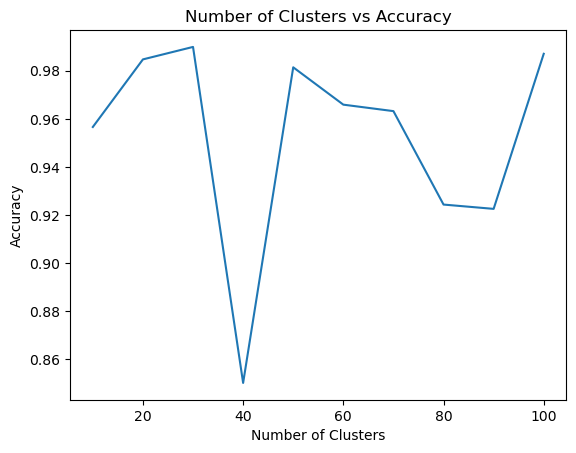

In [17]:
#create plot of number of clusters vs accuracy
def plot_accuracy_vs_num_clusters(score_of_cluster):
    num_clusters = list(score_of_cluster.keys())
    accuracy = [score_of_cluster[i][0][1] for i in num_clusters]
    plt.plot(num_clusters, accuracy)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Accuracy')
    plt.title('Number of Clusters vs Accuracy')
    plt.show()

plot_accuracy_vs_num_clusters(score_of_cluster)

The plot above is the number of clusters vs accuracy. It's unclear to me why 40 clusters has such a localized drop in performance. 

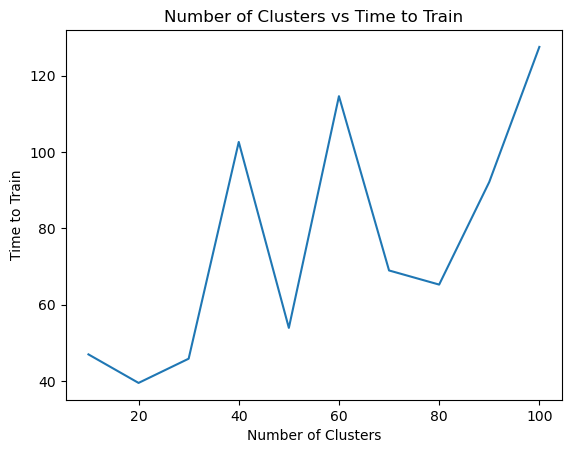

In [18]:
#create plot of number of clusters vs time to train
def plot_time_vs_num_clusters(score_of_cluster):
    num_clusters = list(score_of_cluster.keys())
    time = [score_of_cluster[i][2] for i in num_clusters]
    plt.plot(num_clusters, time)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Time to Train')
    plt.title('Number of Clusters vs Time to Train')
    plt.show()

plot_time_vs_num_clusters(score_of_cluster)

Above is a plot of the time it took to train the model for the different number of clusters.

This visualization gives some insight into why the 10-30 cluster range performed the best. One interpretation could be that after 30 or so clusters, the time to train also increases the time where it is possible for the model to engage in overfitting. Another could be that due to the nature of retraining on the concatenated dataset the model was provide more opporitunity to become confused over what the introduction of new data means about the task. 

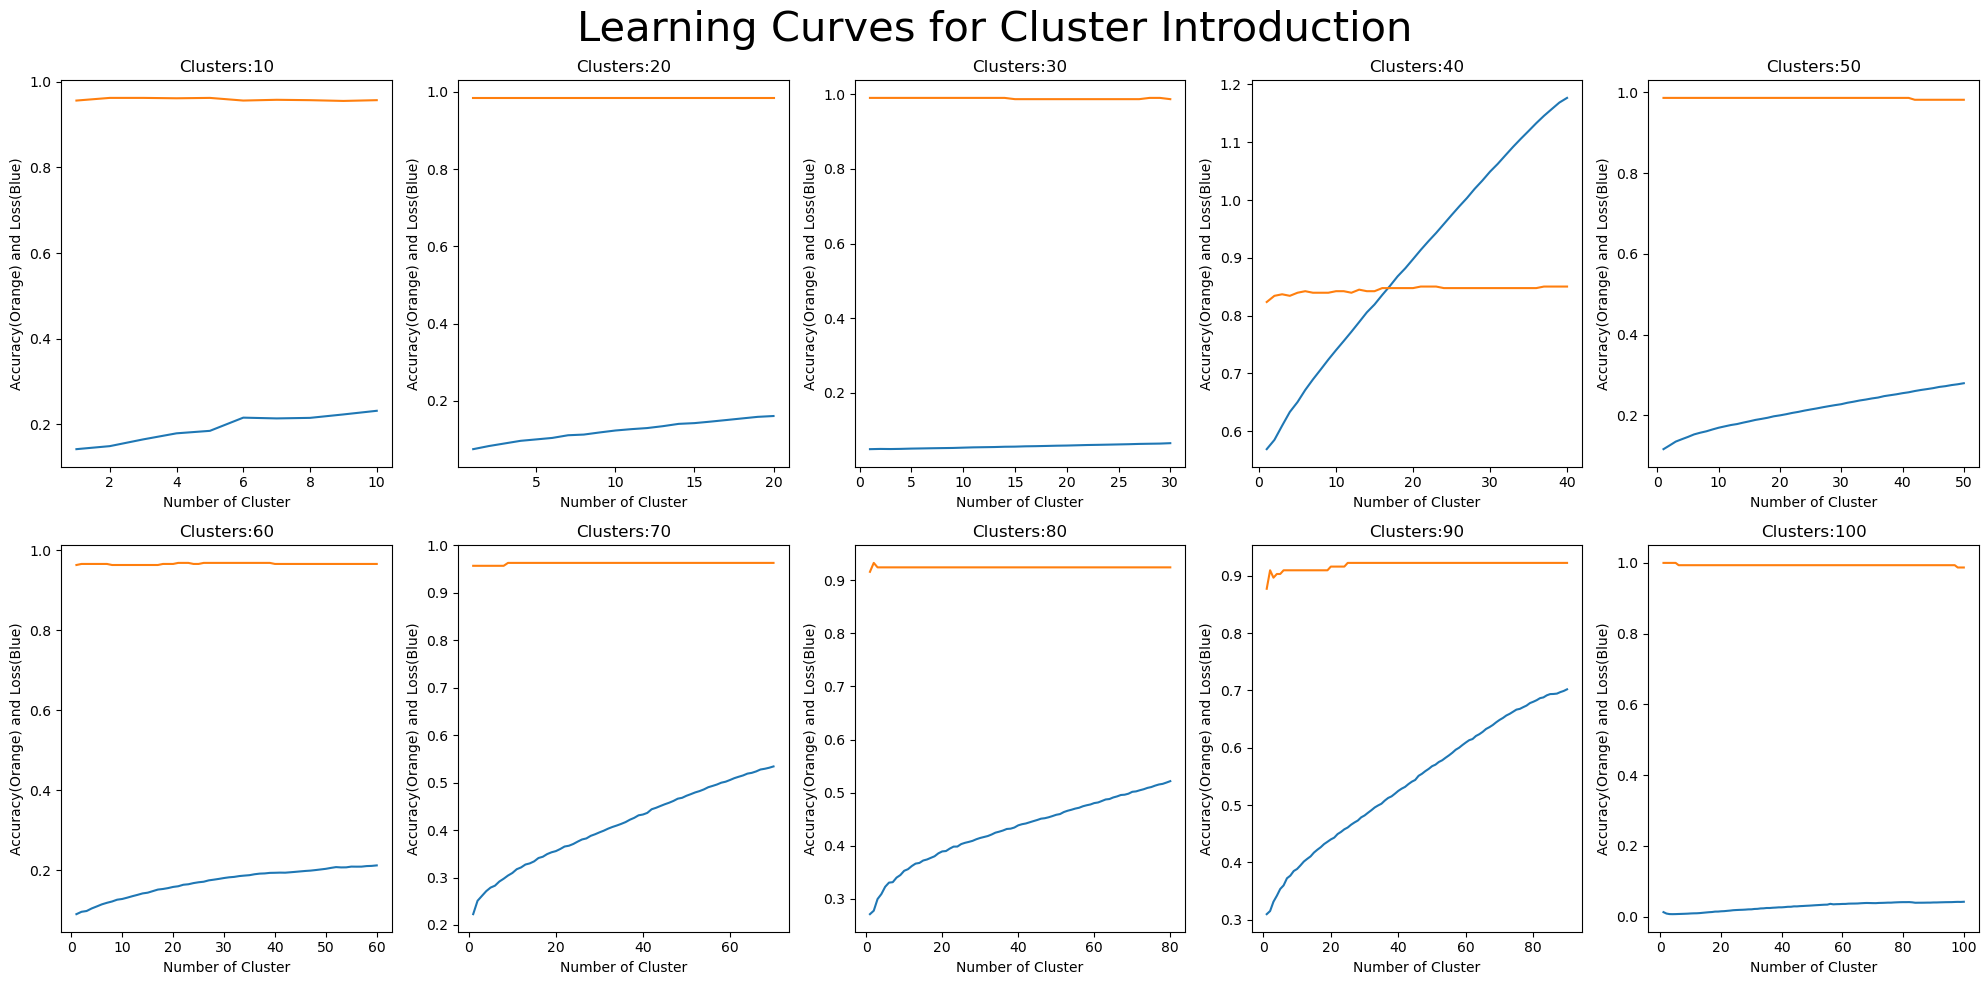

In [51]:
historical_scores = []
for i in range(10):
    scores_list = score_of_cluster[10 * (i+1)][1]
    historical_scores.append(scores_list)

fig, axs = plt.subplots(2, 5, figsize=(20,10))  # create a 2x5 grid of subplots
axs = axs.ravel()  # flatten the axs array for easier indexing

for i in range(10):  # loop over each of the 10 lists
    scores = historical_scores[i]  # get the i-th list of scores
    axs[i].plot(range(1, len(scores)+1), scores)  # plot scores against number of clusters
    axs[i].set_title('Clusters:'+str(10 * (i+1)))  # give each subplot a title
    axs[i].set_xlabel('Number of Cluster')  # x-label
    axs[i].set_ylabel('Accuracy(Orange) and Loss(Blue)')  # y-label
fig.suptitle("Learning Curves for Cluster Introduction", fontsize=30)
    
plt.tight_layout()  # ensures adequate spacing between subplots
plt.show()  # display the plots


Above is a plot of the learning curves of the model for the different numbers of clusters it was iteratively trained on. The plot was generated using the historical evaluations of the model after being trained on the newly concatenated datasets.

This plot does a good job at illustrating one of the possible benefits of this method of training. From the start of training, the model is able to achieve a very high accuracy, and as new clusters are introduced into the datasets the task becomes how to best preserve that accuracy as you add in new clusters. This might be because the task is relatively uniform when the dataset is a single cluster and therefore, the model becomes very in tune with that specific type of variation. This could be thought of as "ramping up the difficulty". The learning curve plot for 30 clusters is the plot where the least initial performance was lost. The other plots show a steady rise in loss and decline in accuracy. 

This is different that training the model on the entire dataset at once where the accuracy climbs up to its peak as training is carried out (this is visible in the learning curves ).

# Comparision to Ordinary Training

Next we'll compare to training on the entire dataset with no complexity scheduling

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 #normalize the data
#create validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) #split data into train and validation

model = define_new_mode()
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), callbacks=[EarlyStopping(patience=10)], verbose=0)

In [44]:
model.evaluate(x_test, y_test, verbose=0)

[0.11312918365001678, 0.973800003528595]

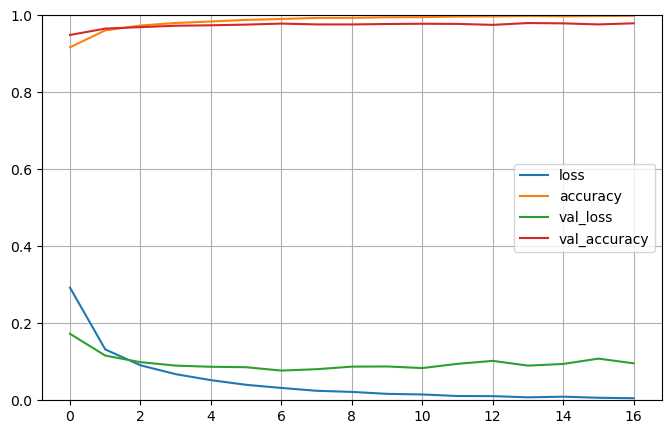

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

This plot of the learning curves further illustrates the difference between the way this model was trained and how the complexity scheduling models were trained. The model clibs to its peak accuracy as opposed to holding onto its peak accuracy. 